In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from astroML import stats as astroMLstats

plt.rcParams['figure.figsize'] = [5,5]
%config InlineBackend.figure_format='retina' 

In [3]:
p_clear_clear= 0.9
p_clear_cloud= 0.5
np.random.seed(42)
def generate(p):
    if (np.random.uniform(0,1)<p):
        w=1 #clear
    else:
        w=0 #cloud
    return w  
       
def forecast(w_current):
    
    if w_current==0:
        w_next=generate(p_clear_cloud)
    else:
        w_next=generate(p_clear_clear)
    
    return w_next

In [4]:
N=10000
w_init=0
w=np.array([])
w=np.append(w, w_init)

for i in range(1,N):
    w=np.append(w, forecast(w[i-1]))

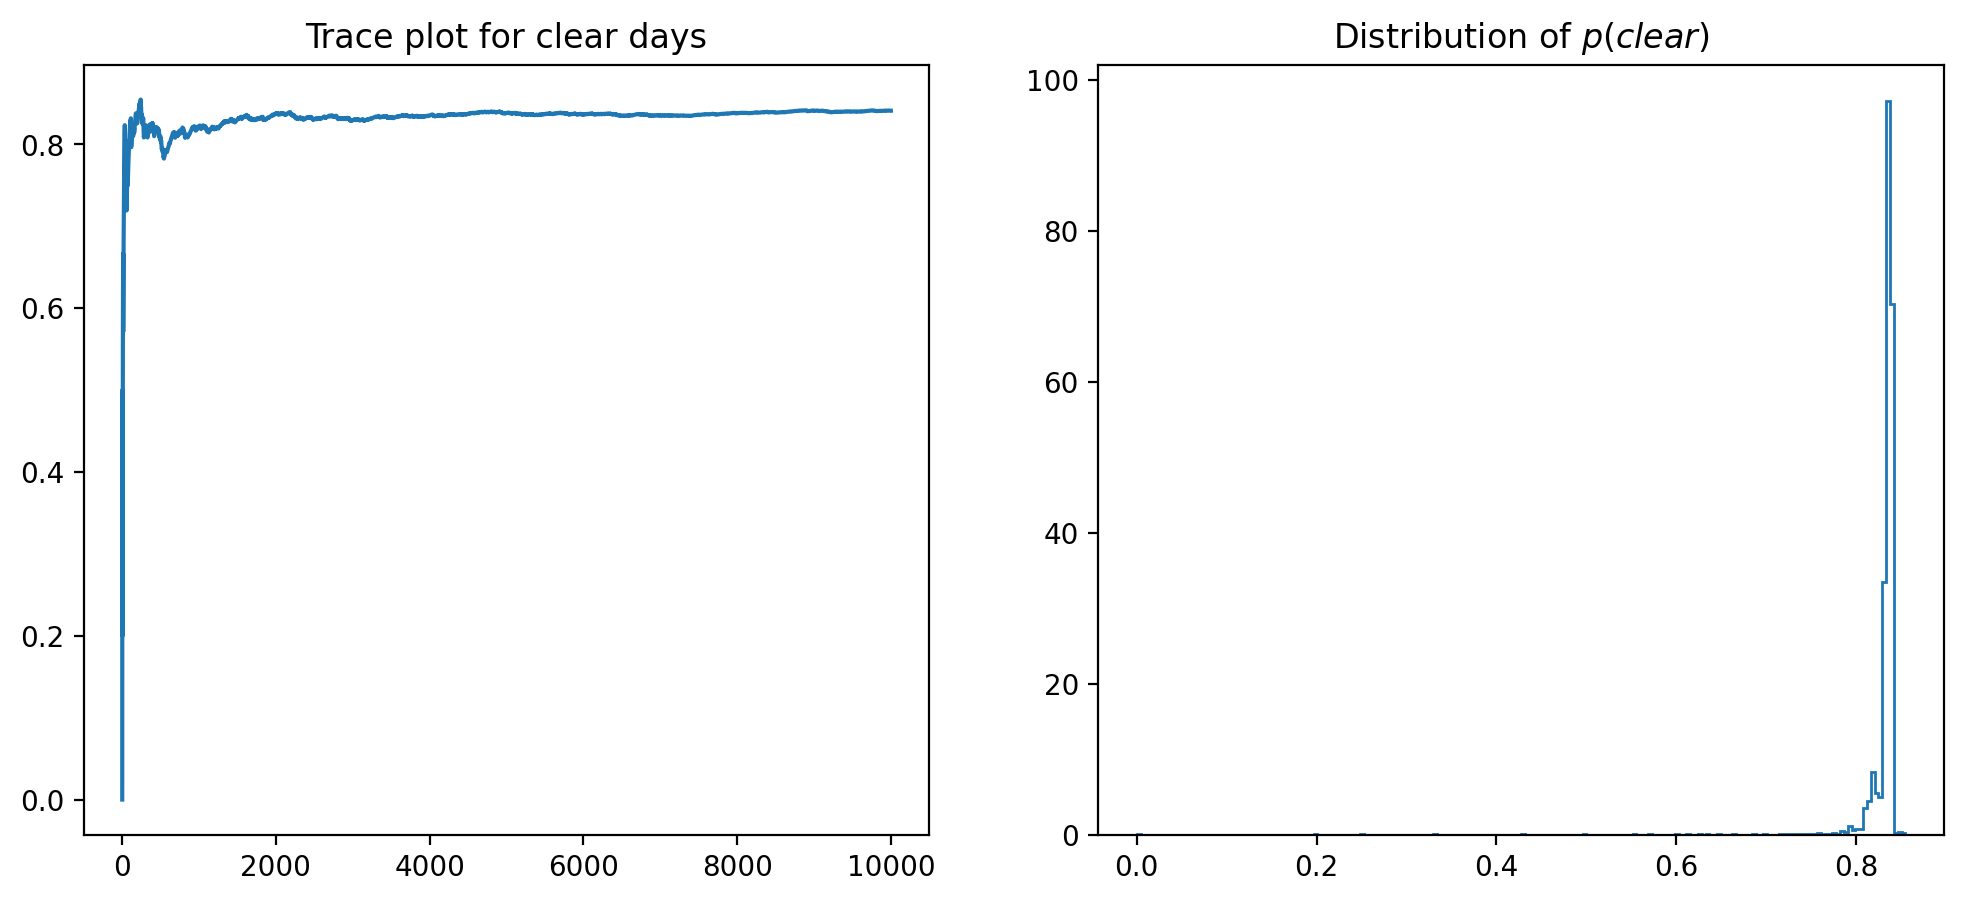

In [5]:
days = np.arange(1,N+1)
clear = np.cumsum(w)/days

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(days, clear)
ax1.set_title('Trace plot for clear days')

ax2.set_title('Distribution of $p(clear)$')
#ax2.set_xlim(0,1)
ax2.hist(clear, bins=200, histtype='step', density=True)
plt.show()


In [6]:
print('Median = %.4f' %np.median(clear))
print('Sigma G = %.5f' %astroMLstats.sigmaG(clear))

Median = 0.8362
Sigma G = 0.00424


### Burn-in

The two plots are strongly influenced by the starting day (cloudy) and in general by the first days.
Now I remove the first points so that the MCMC process is stationary. The greater the number of points I chop off, the more the tails of the distribution go away, which are indeed given by the fisrt days.

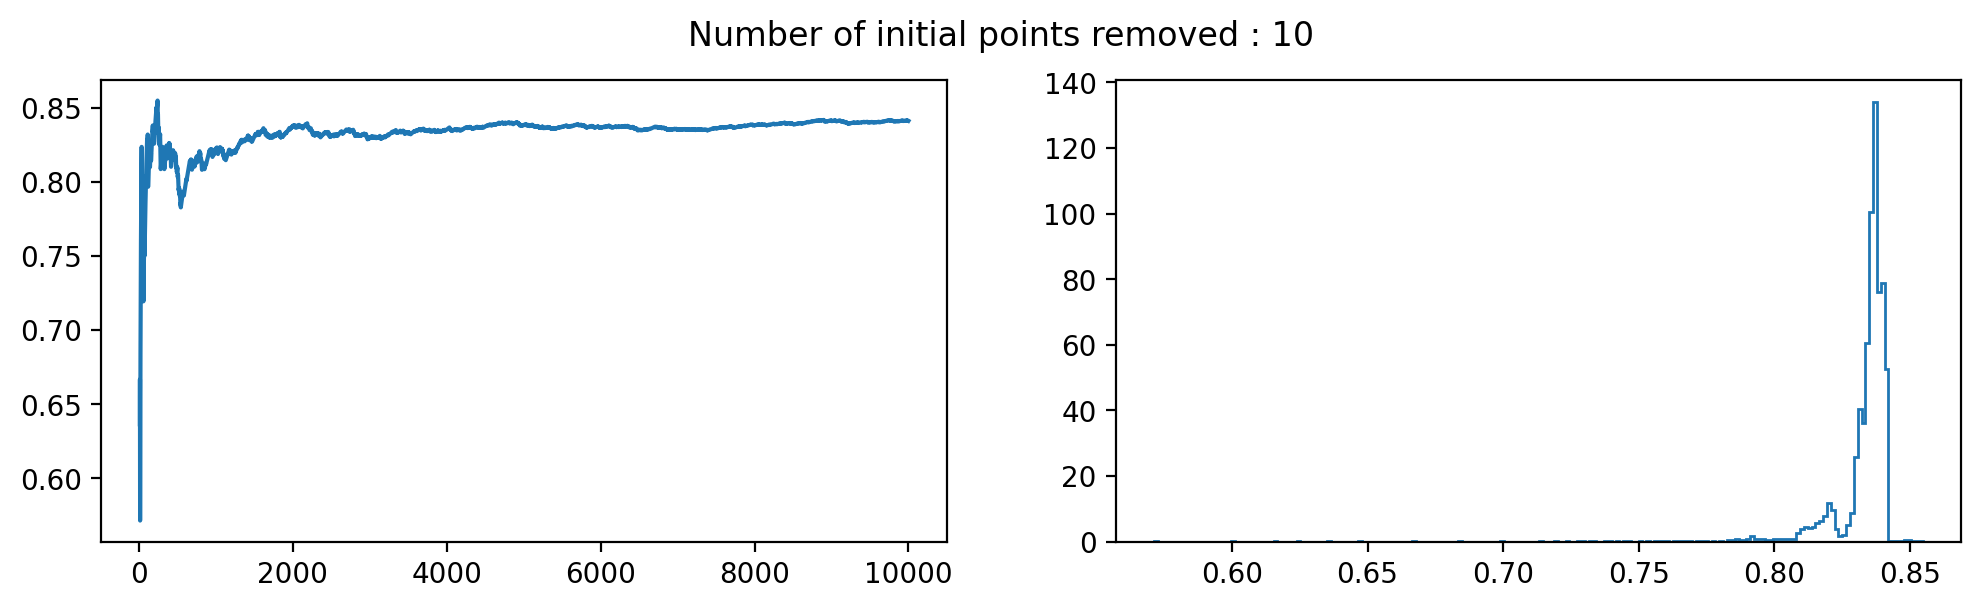

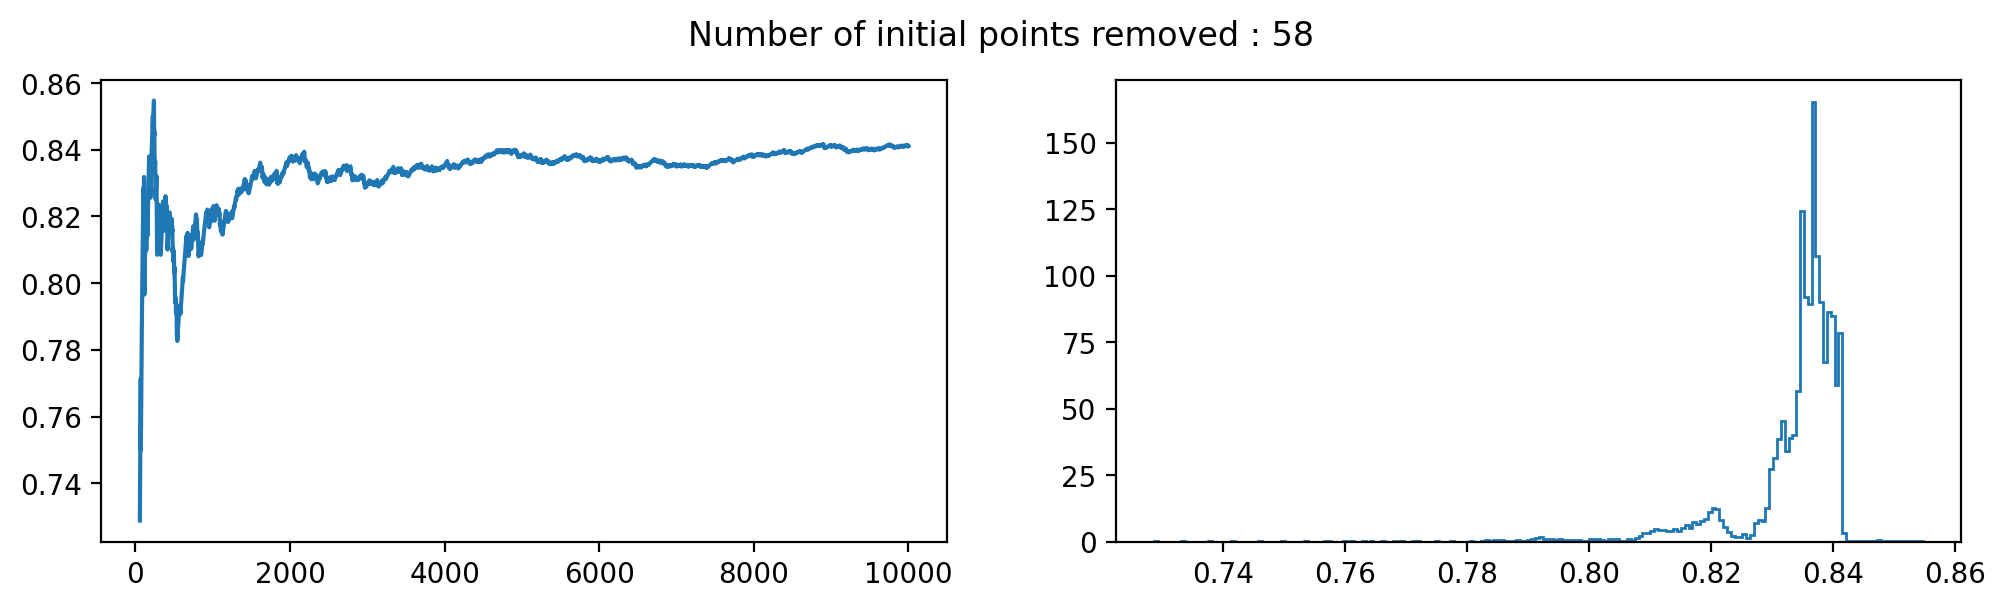

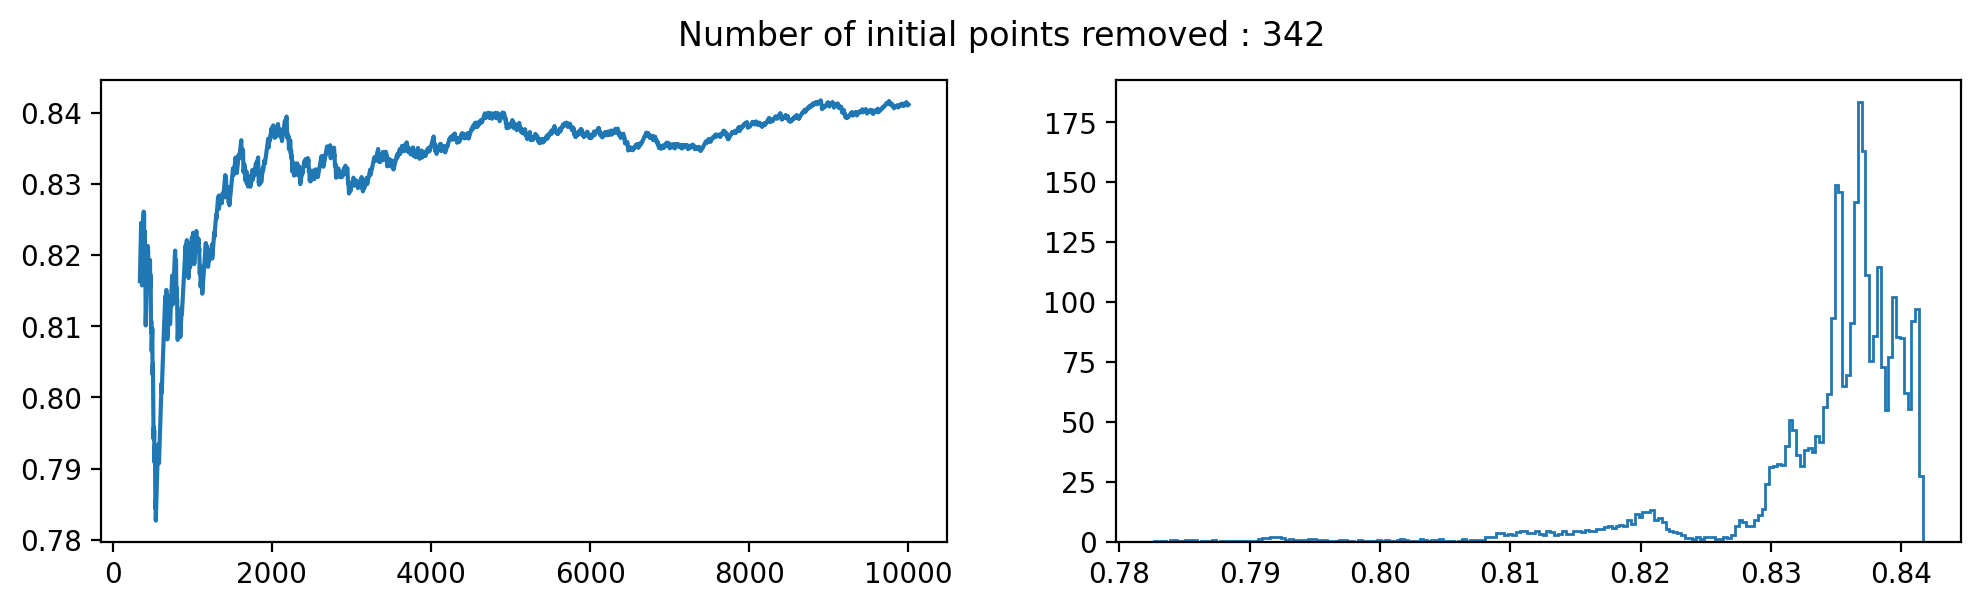

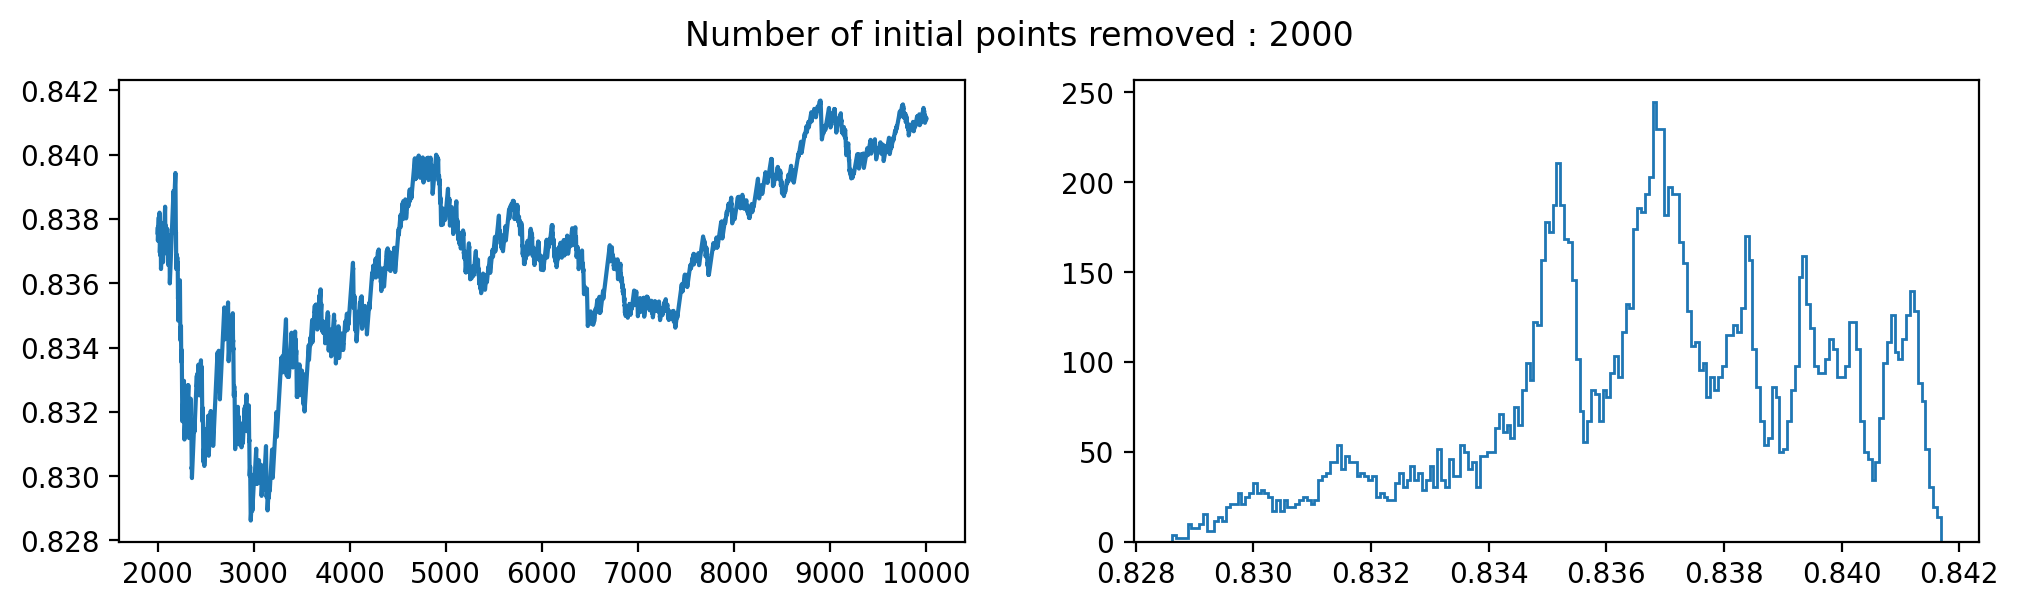

In [7]:
for d_i in np.around(np.geomspace(10,2000,4)).astype(int):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,3))
    ax1.plot(days[d_i:], clear[d_i:])
    fig.suptitle('Number of initial points removed : %i'%d_i)
    ax2.hist(clear[d_i:], bins=200, histtype='step', density=True)
    plt.show()

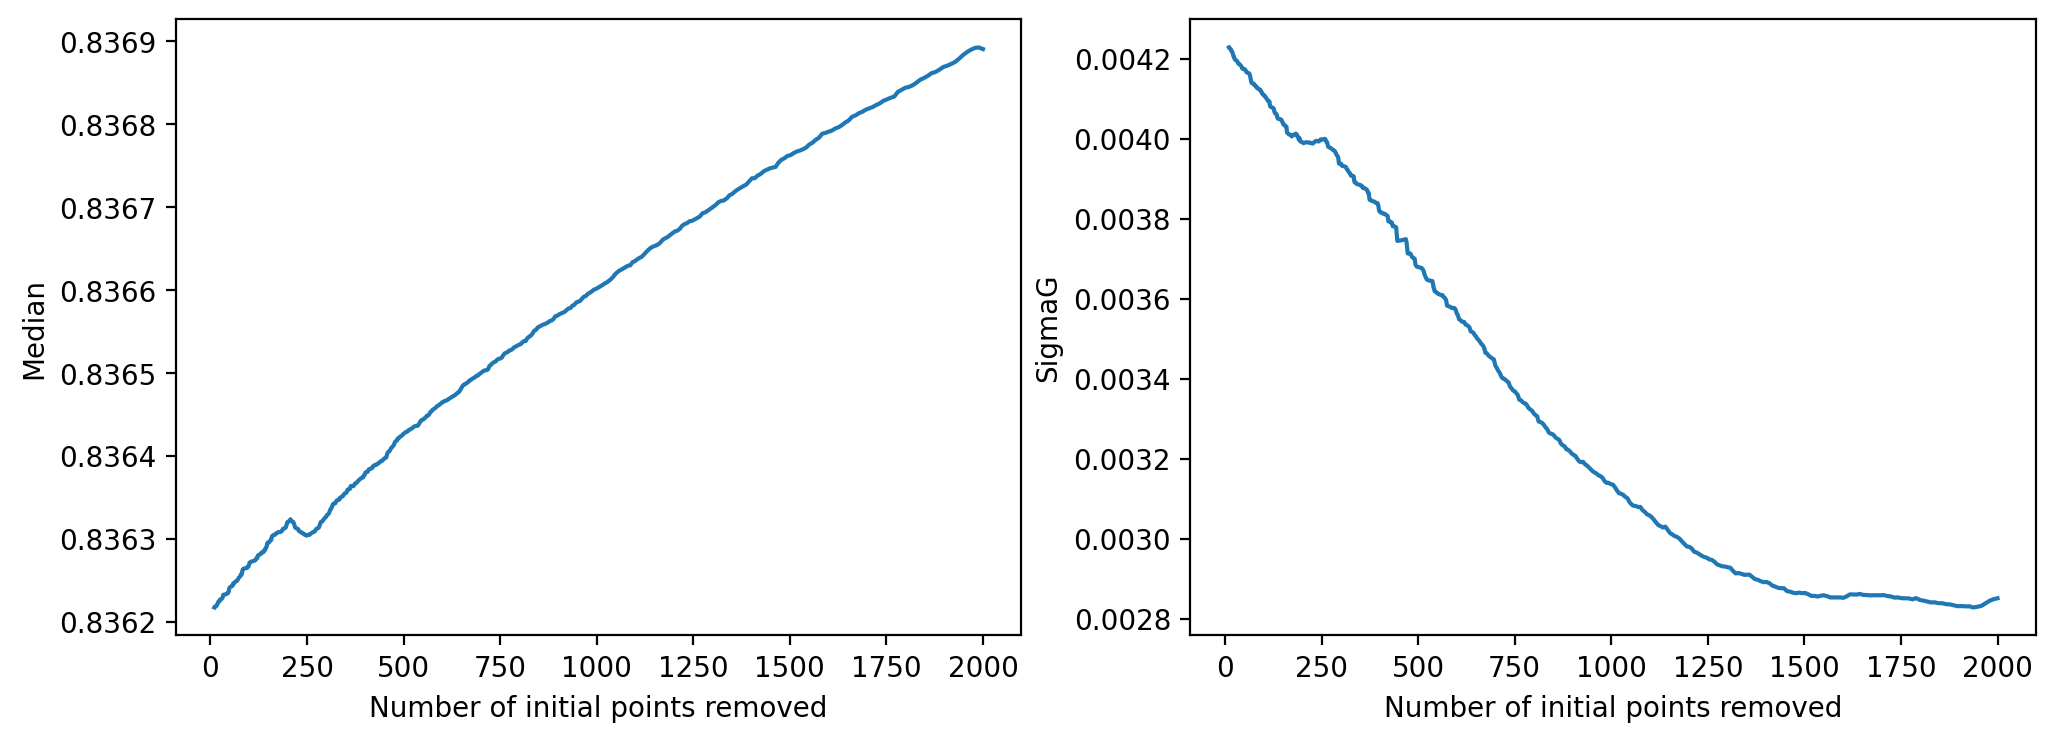

In [8]:
median = []
sigmaG = []
dmax = np.around(np.geomspace(10,2000,1000)).astype(int)
for d_i in dmax:
    median.append(np.median(clear[d_i:]))
    sigmaG.append(astroMLstats.sigmaG(clear[d_i:]))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.set_xlabel('Number of initial points removed')
ax1.set_ylabel('Median')
ax2.set_xlabel('Number of initial points removed')
ax2.set_ylabel('SigmaG')
ax1.plot(dmax,median)
ax2.plot(dmax,sigmaG)
plt.show()

By removing the first points, the median increases because they were mostly cloud days, and sigmaG decreases because the tails of the distribution are removed